In [2]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading data
data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

c:\Users\Namitha john\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Median salary for top 6 data jobs

In [3]:
df_us = df[(df["job_country"] == 'United States')].dropna(subset=['salary_year_avg'])

In [4]:
job_titles = df_us['job_title_short'].value_counts().head(6).index.to_list()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [5]:
df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)]

In [6]:
job_order = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index

(0.0, 600000.0)

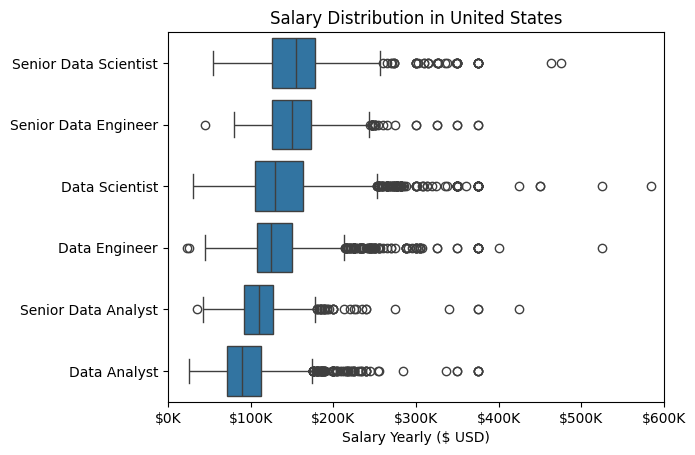

In [7]:
sns.boxplot(data = df_us_top6, x='salary_year_avg', y= 'job_title_short', order=job_order)
plt.title('Salary Distribution in United States')
plt.xlabel('Salary Yearly ($ USD)')
plt.ylabel('')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

plt.xlim(0,600000)

## Investigating median salary vs skills for data analysts


In [8]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_da_us = df_da_us.dropna(subset = ['salary_year_avg'])

In [9]:
df_da_us = df_da_us.explode('job_skills')

In [12]:
df_top_pay = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by='median',ascending=False)
df_top_pay = df_top_pay.head(10)

In [15]:
df_top_skills = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by='count',ascending=False)
df_top_skills = df_top_skills.head(10).sort_values(by='median', ascending= False)

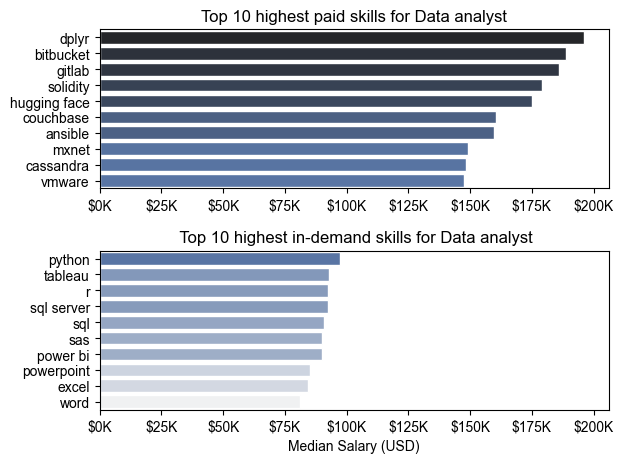

In [16]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

#df_da_top_pay[::-1].plot(kind = 'barh', y='median', ax= ax[0], legend=False)
sns.barplot(data =df_top_pay, x = 'median', y= df_top_pay.index, ax=ax[0], hue='median', palette="dark:b_r")
ax[0].legend().remove()
ax[0].set_title('Top 10 highest paid skills for Data analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

#df_da_top_skills[::-1].plot(kind = 'barh', y='median', ax= ax[1], legend= False)
sns.barplot(data =df_top_skills, x = 'median', y= df_top_skills.index, ax=ax[1], hue='median', palette="light:b")
ax[1].legend().remove()
ax[1].set_title(' Top 10 highest in-demand skills for Data analyst')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()